Elbert, 2017. Based on sample iPython notebook at: https://www.mantidproject.org/Using_IPython_Notebook

## <span style="background-color: #FFFF00">Introduction to Mantid</span>

>O. Arnold, et al., Mantid—Data analysis and visualization package for neutron scattering and μSR experiments, Nuclear Instruments and Methods in Physics Research Section A, Volume 764, 11 November 2014, Pages 156-166, http://dx.doi.org/10.1016/j.nima.2014.07.029

The Mantid Project is a high-performance framework created to manipulate and analyze neutron scattering and muon spectroscopy data. Mantid is developed and in use at ISIS, ILL, and the SNS.

The Mantid Framework exposes its functionality through a Python API (application programming interface). This interface is the same one accessible through MantidPlot's script windows.

In this introduction, we will be using Mantid's Python API, and matplotlib. Basic knowledge of Python, Mantid, and Jupyter notebooks is helpful. Mantid documentation can be found online at: https://www.mantidproject.org/Documentation

## Initialization

Mantid in the MEDE Container is installed in a virtual Python 2.7.x environment called py27mantid. That isolates the installation from other packages that may be incompatible with Mantid. Before you can start work you must activate the virtual environment, provide the system with a path to Mantid, and then import Mantid's Python API.  That is handled by three simple commands:

### Setup Mantid

In [ ]:
!source activate py27;
import sys
import os
sys.path.append("/home/idies/anaconda3/envs/py27mantid/lib/python2.7/site-packages/mantid/");
from mantid.simpleapi import *


In [1]:
import sys
import os
sys.path.append("/home/idies/anaconda3/envs/py27mantid/lib/python2.7/site-packages/mantid/");
from mantid.simpleapi import *


In [ ]:
!conda info --envs

If you receive an error, Mantid may not be properly installed. If you are sure it is installed correctly, and you know where, you can manually specify where it can be found before importing it like this:

```python
sys.path.append("/path/to/Mantid")
from mantid.simpleapi import *
```

In [2]:
import sys
print sys.version

2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


### Importing matplotlib

To plot our data inside our Notebook we use a Python module called "matplotlib".
Importing it is easy. We also set it up to return the plots in the notebook, rather than in some other window or file, by using the inline command:

In [3]:
#Import matplotlib's pyplot interface under the name 'plt'
import matplotlib.pyplot as plt

#Some magic to tell matplotlib how to behave in IPython Notebook
%matplotlib inline

## Using the Mantid Framework

Now that we have the Mantid Framework imported we can use it just like we would in the dedicated app MantidPlot. The difference is that in a Notebook we have a complete record of what we've done. It can be reproduced, modified, or given to someone else to use.  We'll start by checking our working directory and then loading some data from the ISIS pulsed neutron source facility:

In [4]:
pwd

u'/home/idies/workspace/persistent/mantid'

The following are Mantid commands to load a histogram data file (working directly with the .nxs file from the beamline) and then create some point data values:

In [5]:
#Load some histogram data
hist_data = Load("INTER00013460.nxs")

#Create some point data
from math import sin, cos, exp
x_values = range(100)
sin_data = CreateWorkspace(x_values, map((lambda x: -x * sin(x * 0.1)), x_values))
cos_data = CreateWorkspace(x_values, map((lambda x: 10 * cos(x * 0.25)), x_values))
exp_data = CreateWorkspace(x_values, map((lambda x: exp(x) * (1 + sin (x))), x_values))

A workspace's data can be accessed using the `readY`, `readX`, and `readE` functions. They each take the workspace indices (the same as a spectrum id, minus one) as a parameter and return an array in NumPy format.

### Plotting Point Data

Point data is the simplest to plot, and can be passed directly to matplotlib for plotting.

Creating a simple linear plot is a single Mantid command, here with a few options:

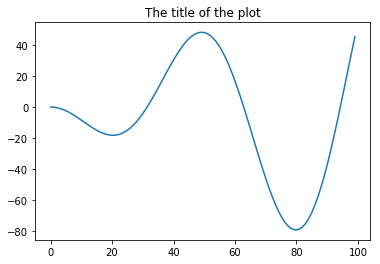

In [6]:
#Plot a single curve
plt.plot(sin_data.readX(0), sin_data.readY(0)) #Plot the first spectrum (workspace index 0) of point_data
plt.title("The title of the plot")
plt.show() #Draw the plot

It's easy to produce a more sophisticated plot. Let's try plotting two curves simultaneously this time, with a grid and a legend.

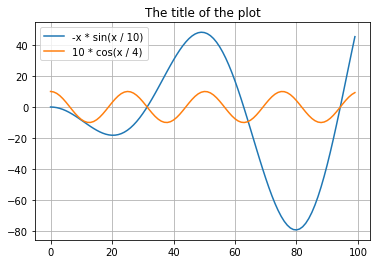

In [7]:
#Plot multiple curves
plt.plot(sin_data.readX(0), sin_data.readY(0), label="-x * sin(x / 10)")
plt.plot(cos_data.readX(0), cos_data.readY(0), label="10 * cos(x / 4)")
plt.title("The title of the plot")
plt.grid() #Show a grid
plt.legend() #Show a legend
plt.show() #Draw the plot

What if we have some kind of exponential function and we would like a logarithmic plot?

Well, we can set the scale of an axis like this:

```python
plt.xscale("linear")
plt.yscale("log")
```

Further details on setting the scale can be found here: http://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.xscale

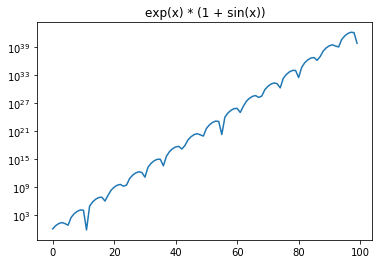

In [8]:
#Plot
plt.plot(exp_data.readX(0), exp_data.readY(0))
plt.title("exp(x) * (1 + sin(x))")
plt.yscale("log") #Set the Y scale to be logarithmic
plt.show()

### Plotting Histogram Data

Histogram data is a little tricker to plot. **Y values are inversely proportional to their bin widths**, which may cause your plots to appear inaccurate. This can be resolved by rebinning the data with a bin width of `1`.

Excel users know how tricky it can be to properly bin data like this.  One great advantage of working in the notebook environment is that the work is transparent so it can be reviewed or debugged to prevent errors.

In [9]:
#Rebin the data to normalise the Y values
rebinned_hist_data = Rebin(hist_data, Params="5,1,100000") # startx = 5, binwidth = 1, endx = 100000

The last step before being able to plot the histogram data is to convert it to point data. This is required because Mantid stores the bin boundaries in the X axis, and values for the Y axis, and matplotlib expects X,Y value pairs. The `ConvertToPointData` algorithm corrects the X axis for plotting.

In [10]:
#Convert to a format matplotlib can plot
pdata = ConvertToPointData(rebinned_hist_data)

We now have the data in a format suitable for plotting with matplotlib. The actual plot function is similar to something from Mathematica or Matlab with lots of options available to add labels or control stylistic things. 

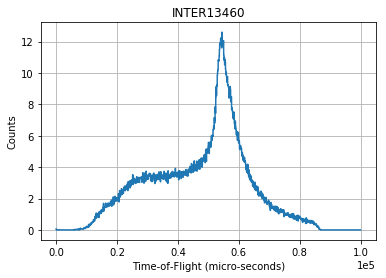

In [11]:
#Plot
plt.plot(pdata.readX(3), pdata.readY(3)) #Plot the fourth spectrum (workspace id 3)
plt.title("INTER13460")
plt.xlabel("Time-of-Flight (micro-seconds)")
plt.ylabel("Counts")
#Use scientific notation for the x axis
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
plt.show()

We can make use of any Mantid algorithms we like to transform the data, and plot the results. For example, you may want to smooth the data. 

In [12]:
#Smooth the data
smoothed = SmoothData(rebinned_hist_data, npoints = 1000)
spdata = ConvertToPointData(smoothed)

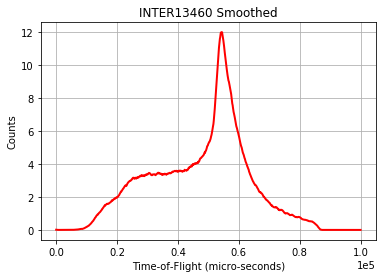

In [13]:
#Plot
plt.plot(spdata.readX(3), spdata.readY(3), color="red", linewidth=2) #Custom colour and linewidth can be specified
plt.title("INTER13460 Smoothed")
plt.xlabel("Time-of-Flight (micro-seconds)")
plt.ylabel("Counts")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid()
plt.show()

It is also possible to run entire workflow algorithms and plot their output.

In [14]:
#Process
IvsQ, _, _ = ReflectometryReductionOneAuto(rebinned_hist_data, ThetaIn=0.7)
IvsQ_point = ConvertToPointData(IvsQ)

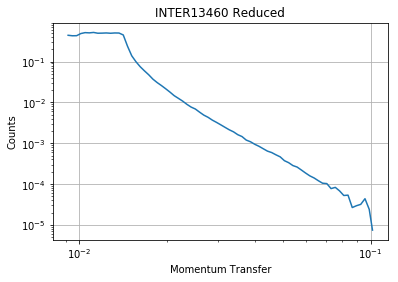

In [15]:
#Plot
plt.plot(IvsQ_point.readX(0), IvsQ_point.readY(0))
plt.title("INTER13460 Reduced")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Momentum Transfer")
plt.ylabel("Counts")
plt.grid()
plt.show()

## Further Reading

You should now have a good idea of how to incorporate the data processing capabilities of Mantid into your IPython notebooks, and how to use the matplotlib library to plot Mantid workspaces.

If there is more you would like to know, more detailed documentation can be found here:
* [Mantid Framework Python API Reference](http://docs.mantidproject.org/nightly/api/python/index.html)
* [IPython Notebook Documentation](http://ipython.org/ipython-doc/stable/notebook/)
* [matplotlib Documentation](http://matplotlib.org/contents.html)